<a href="https://colab.research.google.com/github/v-demydchenko/Python-for-DA/blob/main/HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Data Analyst/data.python/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [109]:
df.head(100)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,seasons_name
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,Весна
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,Весна
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2,Весна
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3,Весна
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4,Весна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2,2011-01-05,5,1,2,Wednesday,2011,1,4,Весна
2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3,2011-01-05,5,1,2,Wednesday,2011,1,5,Весна
2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33,2011-01-05,5,1,2,Wednesday,2011,1,6,Весна


Даних 10886 рядків, 19 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


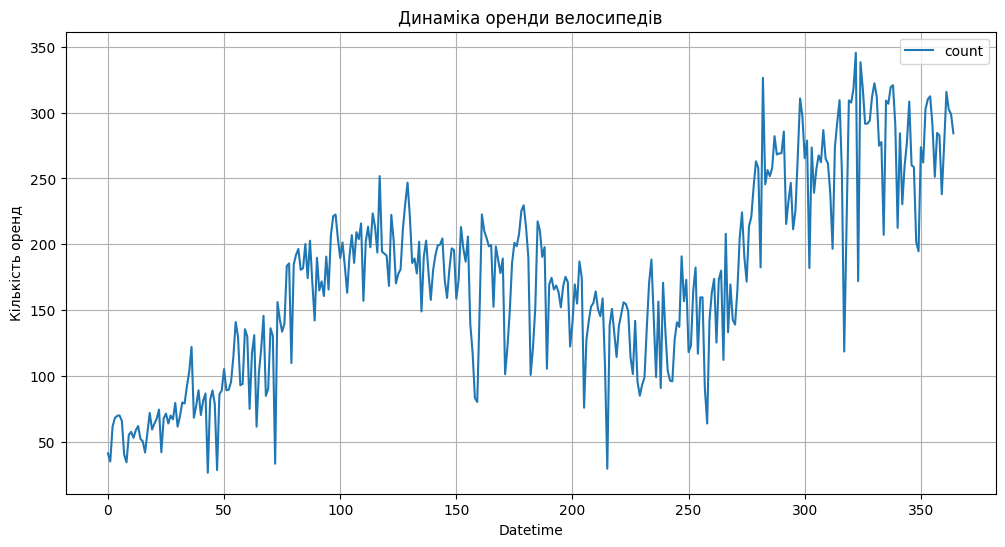

In [102]:
groupped_count = df.groupby('date')['count'].mean().reset_index()
groupped_count.head(365).plot(
    figsize=(12, 6),
    xlabel = 'Datetime',
    ylabel = 'Кількість оренд',
    title='Динаміка оренди велосипедів',
    grid = True
    );
  # 1. я вивів дані за рік. заломи можуть бути через погодні умови, свята, та робочі дні. на графіку видно, що попит підвищується з настанням весни
  # і знижається ближче до зими.
  # 2. загальна тенденція - не дивлячись на сезонний попит, постійно збільшується клієнтська база.
  # 3. сезонні коливання чітко помітні.
  # 4. аномальні значення, як я вказав вище, можуть бути через погодні умови, свята, та робочі дні


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [4]:
seasons = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
df['seasons_name'] = df['season'].map(seasons)
season_avg = df.groupby('seasons_name')['count'].mean().sort_values()

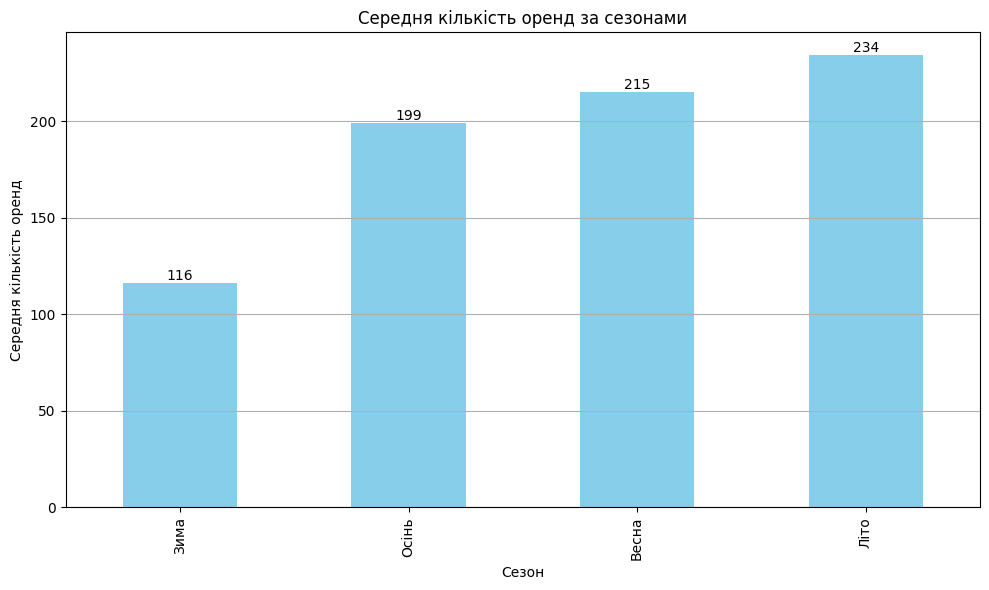

In [5]:
ax = season_avg.plot(kind='bar',
                     figsize=(10, 6),
                     color='skyblue',
                     title='Середня кількість оренд за сезонами')
ax.set_xlabel("Сезон")
ax.set_ylabel("Середня кількість оренд")
ax.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()
# 1. найбільша середня кількість оренди велосипедів літом.
# 2. погодні умови літом сприяють катанню на велосипедах
# 3. різниця між літо(найпопулярнішим сезоном) та зимою(найменш популярним сезоном) відрізняється приблизно у 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


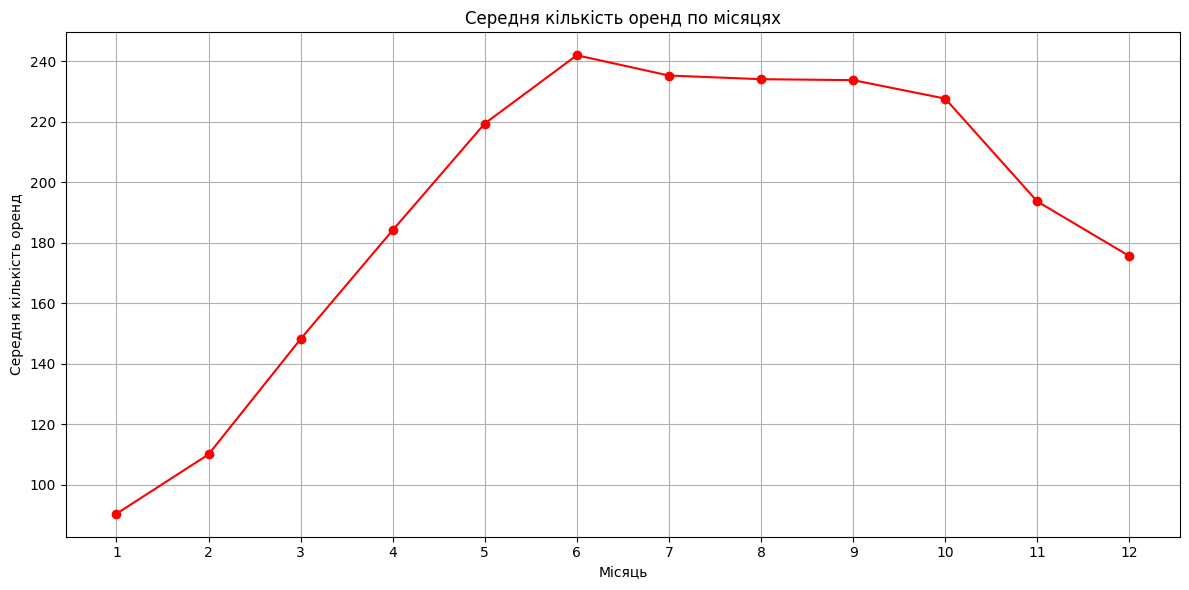

In [7]:
monthly_avg = df.groupby('month')['count'].mean()

# Побудова графіка через pandas.plot
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(12, 6),
    title='Середня кількість оренд по місяцях'
)

ax.set_xlabel("Місяць")
ax.set_ylabel("Середня кількість оренд")
ax.set_xticks(range(1, 13))  # 12 поділок — по кожному місяцю
ax.grid(True)

plt.tight_layout()
plt.show()

# 1. пік оренди велосипедів починається в травні та продовжується до жовтня.
# 2. так, збігаться.
# 3. холодна та волога погода безпосередньо впливає на оренду велосипедів

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [9]:
weather_labels = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дождь', 4: 'Сильний дождь'}

In [27]:
df['weather_desc'] = df['weather'].map(weather_labels)

weather_counts = df['weather_desc'].value_counts()

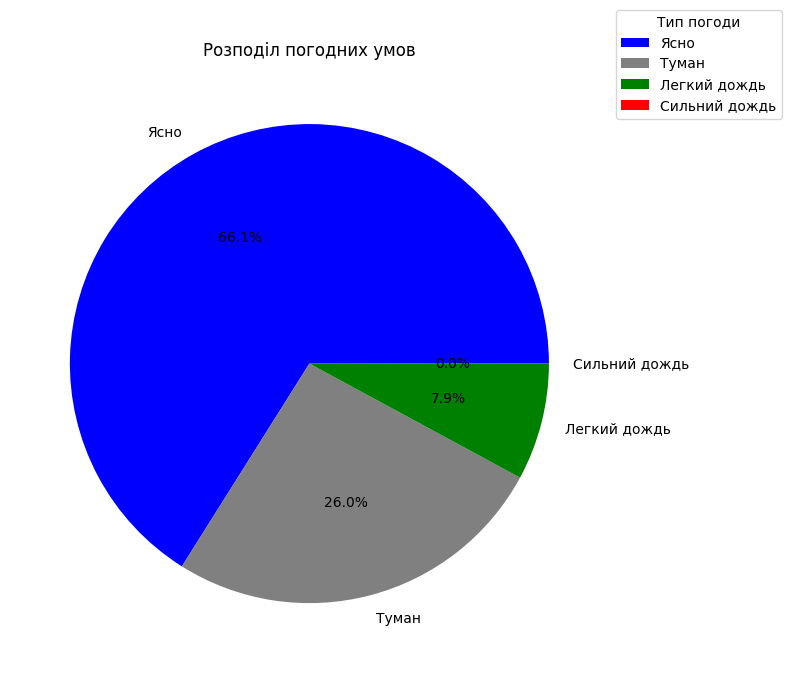

In [31]:
ax = weather_counts.plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Розподіл погодних умов',
    ylabel='',
    colors=['blue', 'gray', 'green', 'red']
)
plt.legend(title='Тип погоди', loc='center left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
# 1. ясна погода переважає.
# 2. є лише один день, коли йде сильний дождь.
# 3. холодна та волога погода безпосередньо впливає на оренду велосипедів

In [30]:
print(df['weather_desc'].value_counts())

weather_desc
Ясно             7192
Туман            2834
Легкий дождь      859
Сильний дождь       1
Name: count, dtype: int64


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

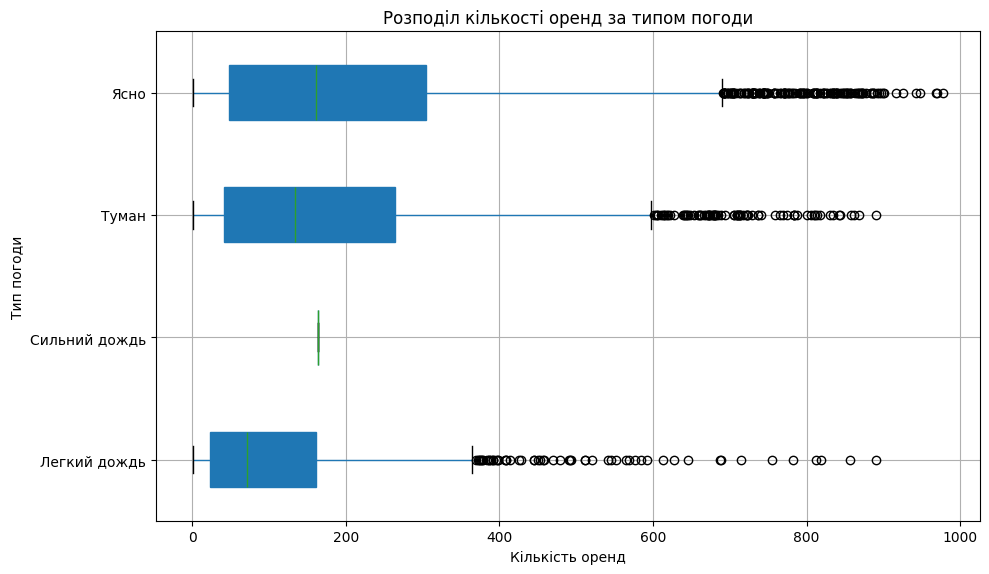

In [41]:
ax = df.boxplot(
    column='count',
    by='weather_desc',
    vert=False,
    figsize=(10, 6),
    patch_artist=True
)

plt.title("Розподіл кількості оренд за типом погоди")
plt.suptitle('')
plt.xlabel("Кількість оренд")
plt.ylabel("Тип погоди")
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. коли ясна погода.
# 2. викиди є при кожній погоді, особливо при ясній
# 3. при ясній погоді

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

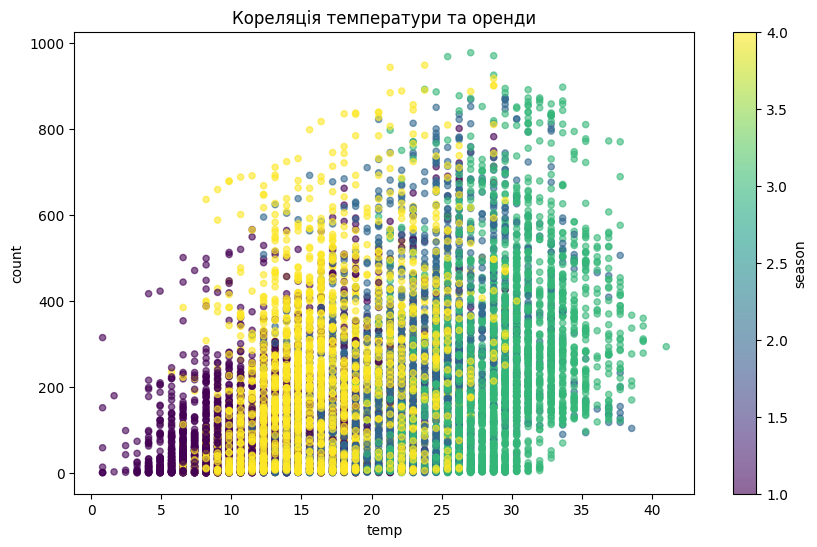

<Figure size 640x480 with 0 Axes>

In [39]:
ax = df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Кореляція температури та оренди',
    figsize=(10, 6),
    alpha=0.6
)
plt.show()
plt.tight_layout()

# судячи з графіку, при підвищенні температури зростає попит

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

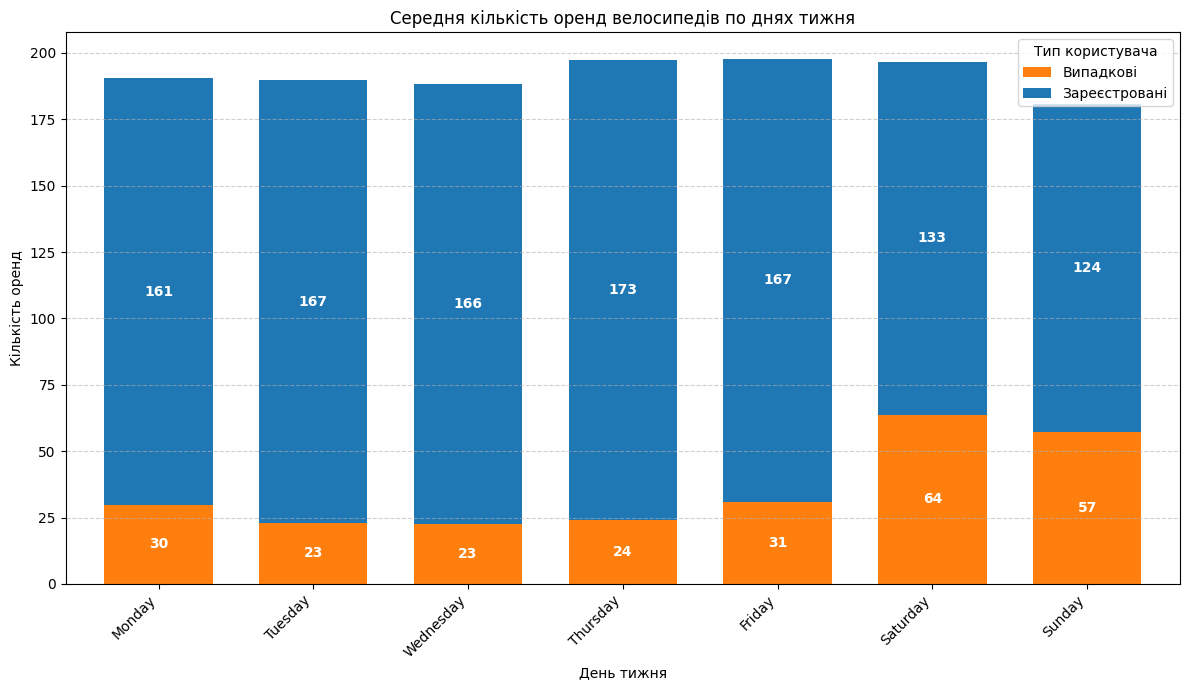

In [46]:
weekday_users = df.groupby('weekday')[['casual', 'registered']].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_users = weekday_users.reindex(weekday_order)

ax = weekday_users.plot.bar(
    stacked=True,
    figsize=(12, 7),
    color=['#ff7f0e', '#1f77b4'],
    title='Середня кількість оренд велосипедів по днях тижня',
    ylabel='Кількість оренд',
    xlabel='День тижня',
    width=0.7
)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Тип користувача', labels=['Випадкові', 'Зареєстровані'])
for container in ax.containers:
     ax.bar_label(container, label_type='center', fmt='%.0f', color='white', fontweight='bold')

plt.tight_layout()
plt.show()
# 1. на протязі робочих днів приблизно одна кількість користувачів орендує велосипеди
# 2. на вихідних більше випадкових користувачів є більше часу для кататання на велосипедах